In [1]:
import pandas as pd
file_path=r"C:\Users\ggmik\Downloads\final_dataset.csv\final_dataset.csv"
df=pd.read_csv(file_path)

In [2]:
df

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,6835,13/05/18,Newcastle,Chelsea,3,0,H,36,62,47,...,0,0,1,0,0,0,-0.289474,0.710526,-0.763158,-0.263158
6836,6836,13/05/18,Southampton,Man City,0,1,NH,37,105,55,...,0,0,1,0,0,0,-0.473684,2.052632,-1.605263,-0.131579
6837,6837,13/05/18,Swansea,Stoke,1,2,NH,27,33,54,...,0,0,0,0,0,0,-0.710526,-0.894737,0.078947,-0.052632
6838,6838,13/05/18,Tottenham,Leicester,5,4,H,69,52,32,...,0,0,0,0,0,0,0.973684,-0.078947,0.710526,0.078947


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
avg_home_goals=df['FTHG'].mean()
avg_away_goals=df['FTAG'].mean()

In [4]:
avg_home_goals

1.527485380116959

In [5]:
avg_away_goals

1.1302631578947369

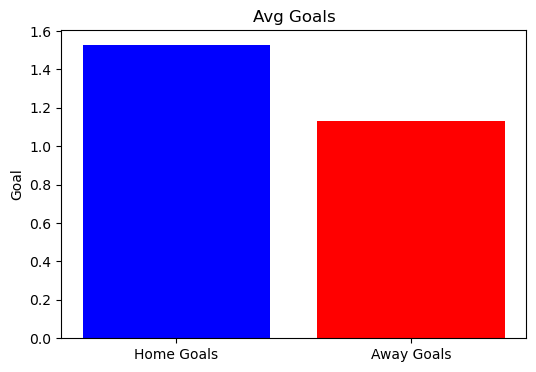

In [6]:
plt.figure(figsize=(6,4))
plt.bar(['Home Goals','Away Goals'],[avg_home_goals,avg_away_goals],color=['blue','red'])
plt.title('Avg Goals')
plt.ylabel('Goal')
plt.show()

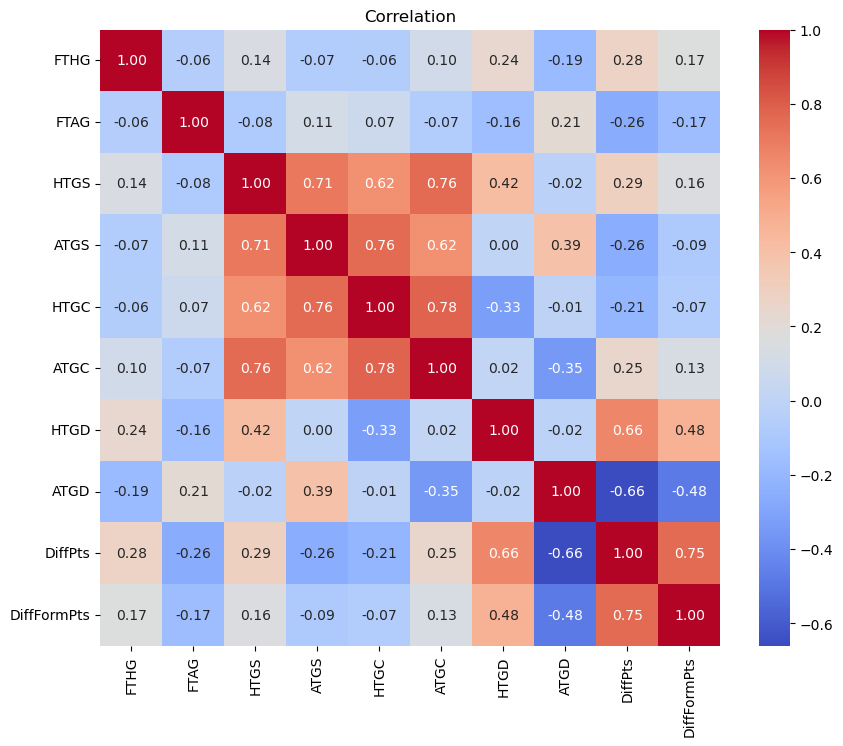

In [7]:
## Heatmap Correlation
numeric_cols = ['FTHG', 'FTAG', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts']
corr_matrix=df[numeric_cols].corr()
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation')
plt.show()

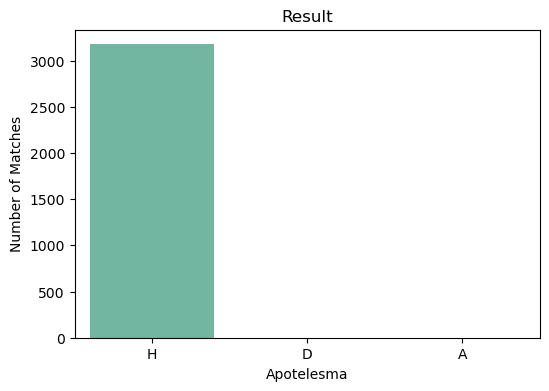

In [8]:
##Barplots για FTΡ
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='FTR', order=['H','D','A'], palette='Set2')
plt.title('Result')  # <- εδώ ήταν το λάθος
plt.xlabel('Apotelesma')
plt.ylabel('Number of Matches')
plt.show()

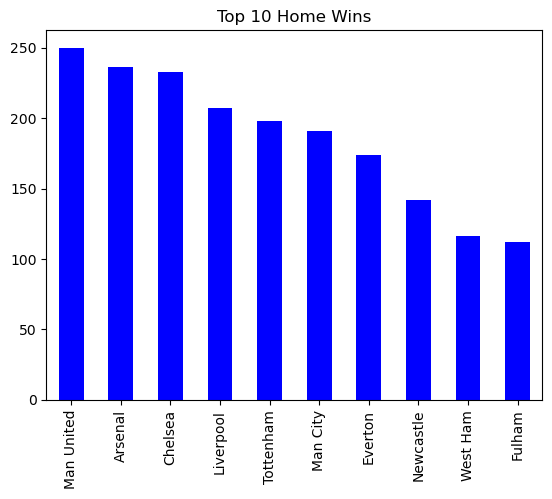

In [9]:
home_wins = df[df['FTR'] == 'H']['HomeTeam'].value_counts()
away_wins = df[df['FTR'] == 'A']['AwayTeam'].value_counts()

# Κορυφαίες 10 ομάδες σε νίκες εντός και εκτός
home_wins.head(10).plot(kind='bar', title='Top 10 Home Wins', color='blue')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Έστω το DataFrame df
# Διαχωρίζουμε τα features και το target
X = df[['HTGS', 'ATGS', 'HTGC', 'ATGC']]  # Features
y = df['FTR'].apply(lambda x: 1 if x == 'H' else (0 if x == 'D' else -1))  # Target (1: home win, 0: draw, -1: away win)

# Διαχωρισμός σε training και test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Εκπαίδευση του μοντέλου
model = LogisticRegression()
model.fit(X_train, y_train)

# Πρόβλεψη στο test set
y_pred = model.predict(X_test)

# Αξιολόγηση του μοντέλου
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(cm)

Accuracy: 0.6330409356725146
Confusion Matrix:
[[565 169]
 [333 301]]


In [11]:
from sklearn.model_selection import GridSearchCV

# Ορίστε το μοντέλο Logistic Regression
model = LogisticRegression()

# Ρυθμίστε το grid search για να δοκιμάσετε διαφορετικούς παραμέτρους
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}

# Ορίστε το GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Εκπαίδευση με το GridSearchCV
grid_search.fit(X_train, y_train)

# Καλύτερη παράμετρος
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'C': 1, 'solver': 'saga'}


In [12]:
# Δημιουργία και εκπαίδευση του μοντέλου με τις καλύτερες παραμέτρους
best_model = LogisticRegression(C=0.1, solver='saga')
best_model.fit(X_train, y_train)

# Κάνουμε προβλέψεις
y_pred_best = best_model.predict(X_test)

# Αξιολόγηση του μοντέλου
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print(f"Best Model Accuracy: {accuracy_best}")
print(f"Best Model Confusion Matrix:\n{conf_matrix_best}")

Best Model Accuracy: 0.6330409356725146
Best Model Confusion Matrix:
[[564 170]
 [332 302]]


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.63      0.77      0.69       734
           1       0.64      0.47      0.55       634

    accuracy                           0.63      1368
   macro avg       0.63      0.62      0.62      1368
weighted avg       0.63      0.63      0.62      1368



In [14]:
from sklearn.ensemble import RandomForestClassifier

# Εκπαίδευση του μοντέλου Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Προβλέψεις
y_pred_rf = rf_model.predict(X_test)

# Αξιολόγηση του Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.63      0.70      0.66       734
           1       0.60      0.52      0.56       634

    accuracy                           0.62      1368
   macro avg       0.61      0.61      0.61      1368
weighted avg       0.62      0.62      0.61      1368



In [15]:
from sklearn.svm import SVC

# Εκπαίδευση του μοντέλου SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Προβλέψεις
y_pred_svm = svm_model.predict(X_test)

# Αξιολόγηση του SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

          -1       0.63      0.81      0.71       734
           1       0.67      0.45      0.54       634

    accuracy                           0.65      1368
   macro avg       0.65      0.63      0.63      1368
weighted avg       0.65      0.65      0.63      1368



In [16]:
from sklearn.model_selection import GridSearchCV

# Ρύθμιση παραμέτρων για το Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs']
}

# GridSearchCV για εύρεση των καλύτερων παραμέτρων
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Καλύτερες παραμέτροι
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

Best Parameters from GridSearchCV: {'C': 0.01, 'solver': 'liblinear'}


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Δημιουργία του μοντέλου με τις βέλτιστες παραμέτρους
log_reg_best = LogisticRegression(C=0.01, solver='liblinear')

# Εκπαίδευση του μοντέλου
log_reg_best.fit(X_train, y_train)

# Πρόβλεψη για τα δεδομένα του test set
y_pred_best = log_reg_best.predict(X_test)

# Αξιολόγηση του μοντέλου
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

# Εκτύπωση αποτελεσμάτων
print(f"Accuracy: {accuracy_best}")
print("Classification Report:")
print(classification_rep_best)

Accuracy: 0.6396198830409356
Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.76      0.69       734
           1       0.64      0.50      0.56       634

    accuracy                           0.64      1368
   macro avg       0.64      0.63      0.63      1368
weighted avg       0.64      0.64      0.63      1368



In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Ορισμός του μοντέλου
logreg = LogisticRegression()

# Παραμέτροι για αναζήτηση
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

# Δημιουργία RandomizedSearchCV
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Εκπαίδευση του μοντέλου
random_search.fit(X_train, y_train)

# Καλύτερο μοντέλο και παραμέτροι
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'solver': 'liblinear', 'max_iter': 200, 'C': 0.001}


In [ ]:
from sklearn.svm import SVC

# Ορισμός του μοντέλου SVM
svm = SVC()

# Παραμέτροι για αναζήτηση
param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Δημιουργία RandomizedSearchCV
random_search_svm = RandomizedSearchCV(svm, param_distributions=param_dist_svm, n_iter=10, cv=5, random_state=42)

# Εκπαίδευση του μοντέλου
random_search_svm.fit(X_train, y_train)

# Καλύτερο μοντέλο και παραμέτροι
print("Best Parameters for SVM:", random_search_svm.best_params_)

In [ ]:
print(X_train.shape)